In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-kc6v5fpk
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-kc6v5fpk
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, string
import seaborn as sns
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from requests_oauthlib import OAuth1
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [ ]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini

#Kata kunci yang digunakan adalah indihome, saya ingin melihat pandangan orang terhadap brand tersebut apakah positif, negatif, atau netral

In [ ]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya

api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
query = "indihome -is:retweet lang:id"
response = tweepy.Paginator(api.search_recent_tweets,
                          query = query,
                          max_results=100
                          ).flatten(limit=300)

tweets = [tweet.text.strip() for tweet in response]
df_tweets = pd.DataFrame(tweets, columns=["tweets"])
df_tweets

,tweets
0,Indihome mulai lagi _-
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee..."
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ..."
3,capek banget seharian internet @IndiHome kayak...
4,"Biar makin semangat dan produktivitas lancar, ..."
...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke..."
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b..."
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...


In [ ]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe

tweets = list(map(lambda x: x.lower(),tweets))
tweets = list(map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(\d+)", " ", x).split()),tweets))
df_tweets['clean_tweets'] = tweets
df_tweets

,tweets,clean_tweets
0,Indihome mulai lagi _-,indihome mulai lagi
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee...",hi kak nay informasikan sod speed on demand me...
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ...",hai kak gin informasikan sod speed on demand m...
3,capek banget seharian internet @IndiHome kayak...,capek banget seharian internet kayak gini tero...
4,"Biar makin semangat dan produktivitas lancar, ...",biar makin semangat dan produktivitas lancar a...
...,...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke...",koneksi pagi gini udh jelek aja keren
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...,pagi router indihome nyala merah gimana ini
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b...",halo sobat apakah ada yang bisa yurai bantu me...
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...,wah keren ya bisa tukar point plus dapat hadia...


In [ ]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian

stop_words = stopwords.words('indonesian')
stop_words.extend(['loh', 'nih', 'yg'])
stop_words = set(stop_words)

word_tokens = df_tweets['clean_tweets'].apply(word_tokenize)
tweets = [' '.join(map(str, l)) for l in word_tokens.apply(lambda x: [item for item in x if item not in stop_words])]
df_tweets['tweet_clean'] = tweets
df_tweets

,tweets,clean_tweets,tweet_clean
0,Indihome mulai lagi _-,indihome mulai lagi,indihome
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee...",hi kak nay informasikan sod speed on demand me...,hi kak nay informasikan sod speed on demand fi...
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ...",hai kak gin informasikan sod speed on demand m...,hai kak gin informasikan sod speed on demand f...
3,capek banget seharian internet @IndiHome kayak...,capek banget seharian internet kayak gini tero...,capek banget seharian internet kayak gini tero...
4,"Biar makin semangat dan produktivitas lancar, ...",biar makin semangat dan produktivitas lancar a...,biar semangat produktivitas lancar paket cocok...
...,...,...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke...",koneksi pagi gini udh jelek aja keren,koneksi pagi gini udh jelek aja keren
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...,pagi router indihome nyala merah gimana ini,pagi router indihome nyala merah gimana
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b...",halo sobat apakah ada yang bisa yurai bantu me...,halo sobat yurai bantu produk layanan indihome...
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...,wah keren ya bisa tukar point plus dapat hadia...,keren ya tukar point plus hadiah nya indihome ...


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
tweets = df_tweets['tweet_clean'].apply(stemming)
df_tweets['tweet_clean'] = tweets
df_tweets

,tweets,clean_tweets,tweet_clean
0,Indihome mulai lagi _-,indihome mulai lagi,indihome
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee...",hi kak nay informasikan sod speed on demand me...,hi kak nay informasi sod speed on demand fitur...
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ...",hai kak gin informasikan sod speed on demand m...,hai kak gin informasi sod speed on demand fitu...
3,capek banget seharian internet @IndiHome kayak...,capek banget seharian internet kayak gini tero...,capek banget hari internet kayak gin terossss
4,"Biar makin semangat dan produktivitas lancar, ...",biar makin semangat dan produktivitas lancar a...,biar semangat produktivitas lancar paket cocok...
...,...,...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke...",koneksi pagi gini udh jelek aja keren,koneksi pagi gin udh jelek aja keren
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...,pagi router indihome nyala merah gimana ini,pagi router indihome nyala merah gimana
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b...",halo sobat apakah ada yang bisa yurai bantu me...,halo sobat yura bantu produk layan indihome ny...
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...,wah keren ya bisa tukar point plus dapat hadia...,keren ya tukar point plus hadiah nya indihome ...


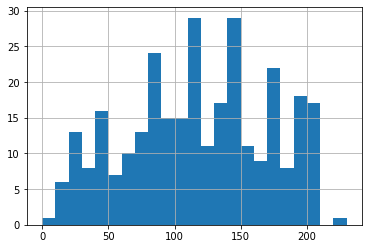

In [ ]:
# Distribusi Frekuensi Jumlah Karakter per Data

bin_range = np.arange(0, 240, 10)
df_tweets['tweet_clean'].str.len().hist(bins=bin_range)
plt.show()

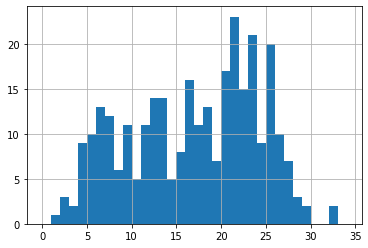

In [ ]:
# Distribusi Frekuensi Jumlah Kata per Data

bin_range = np.arange(0, 35)
df_tweets['tweet_clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

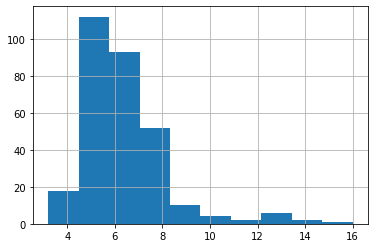

In [ ]:
# Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data

df_tweets['tweet_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [ ]:
# Distribusi Frekuensi Kata

df_tweets['tweet_clean'] = df_tweets['tweet_clean'].apply(lambda x: word_tokenize(str(x)))
words = [word for tweet in df_tweets['tweet_clean'] for word in tweet]

fqdist = FreqDist(words)
print(fqdist)

<FreqDist with 1052 samples and 4936 outcomes>


In [ ]:
# Mengetahui kata dan jumlah dari masing-masing kata

most_common_word = fqdist.most_common(30)
print(most_common_word)

[('indihome', 402), ('aktivitastanpabatas', 119), ('internetnyaindonesia', 91), ('netflix', 60), ('tagih', 58), ('ikut', 56), ('bayar', 55), ('paket', 53), ('lancar', 52), ('streaming', 47), ('tv', 46), ('ya', 45), ('banget', 42), ('rb', 41), ('akses', 39), ('amp', 39), ('yuk', 35), ('sobat', 35), ('semangat', 34), ('layan', 33), ('aja', 31), ('dm', 31), ('kak', 30), ('ngadain', 30), ('bikin', 29), ('internet', 28), ('internetan', 28), ('sampe', 27), ('doang', 27), ('akun', 27)]


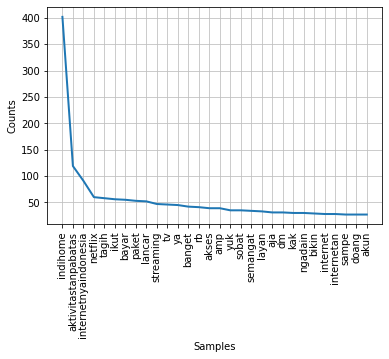

In [ ]:
# Visualisasi
fqdist.plot(30,cumulative=False)
plt.show()

In [ ]:
# Distribusi Bi-Gram

result = pd.Series(nltk.ngrams(words, 2)).value_counts()[:20]
print (result)

(aktivitastanpabatas, internetnyaindonesia)    56
(indihome, aktivitastanpabatas)                43
(aktivitastanpabatas, indihome)                42
(indihome, tv)                                 42
(layan, indihome)                              30
(paket, indihome)                              29
(akses, netflix)                               29
(sobat, indihome)                              28
(tagih, indihome)                              27
(bayar, tagih)                                 27
(jabotabek, ngadain)                           25
(indihome, jabotabek)                          25
(streaming, netflix)                           24
(gabung, sobat)                                23
(lancar, streaming)                            22
(internetan, lancar)                           22
(netflix, puas)                                22
(paket, cocok)                                 22
(indihome, akses)                              22
(biar, semangat)                               21


In [ ]:
df_tweets['tweet_clean'] = df_tweets['tweet_clean'].str.join(" ")
df_tweets

,tweets,clean_tweets,tweet_clean
0,Indihome mulai lagi _-,indihome mulai lagi,indihome
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee...",hi kak nay informasikan sod speed on demand me...,hi kak nay informasi sod speed on demand fitur...
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ...",hai kak gin informasikan sod speed on demand m...,hai kak gin informasi sod speed on demand fitu...
3,capek banget seharian internet @IndiHome kayak...,capek banget seharian internet kayak gini tero...,capek banget hari internet kayak gin terossss
4,"Biar makin semangat dan produktivitas lancar, ...",biar makin semangat dan produktivitas lancar a...,biar semangat produktivitas lancar paket cocok...
...,...,...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke...",koneksi pagi gini udh jelek aja keren,koneksi pagi gin udh jelek aja keren
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...,pagi router indihome nyala merah gimana ini,pagi router indihome nyala merah gimana
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b...",halo sobat apakah ada yang bisa yurai bantu me...,halo sobat yura bantu produk layan indihome ny...
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...,wah keren ya bisa tukar point plus dapat hadia...,keren ya tukar point plus hadiah nya indihome ...


In [ ]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

hasil = []
list_negasi = ['tidak','lawan','anti', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'tak']

for tweet in tweets:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
    
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")

positif: 0
negatif: 0
-----------------------------------------------------
sesuai
positif: 1
negatif: 0
-----------------------------------------------------
sesuai
positif: 1
negatif: 0
-----------------------------------------------------
capek
positif: 0
negatif: 1
-----------------------------------------------------
cocok
lancar
semangat
puas
praktis
tagih
positif: 6
negatif: 2
-----------------------------------------------------
hidup
donasi
sampah
positif: 2
negatif: 1
-----------------------------------------------------
ayo
hadiah
positif: 2
negatif: 0
-----------------------------------------------------
lancar
semangat
puas
praktis
tagih
positif: 6
negatif: 2
-----------------------------------------------------
mahal
positif: 0
negatif: 1
-----------------------------------------------------
mahal
positif: 0
negatif: 1
-----------------------------------------------------
cocok
lancar
semangat
puas
praktis
tagih
positif: 5
negatif: 2
--------------------------------------

In [ ]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df_tweets["sentiment"] = sentiments
df_tweets

,tweets,clean_tweets,tweet_clean,sentiment
0,Indihome mulai lagi _-,indihome mulai lagi,indihome,netral
1,"@ZeldaSieg Hi, Kak. Nay informasikan SOD (Spee...",hi kak nay informasikan sod speed on demand me...,hi kak nay informasi sod speed on demand fitur...,positif
2,"@txtdarinyunyu Hai, Kak. Gin informasikan SOD ...",hai kak gin informasikan sod speed on demand m...,hai kak gin informasi sod speed on demand fitu...,positif
3,capek banget seharian internet @IndiHome kayak...,capek banget seharian internet kayak gini tero...,capek banget hari internet kayak gin terossss,negatif
4,"Biar makin semangat dan produktivitas lancar, ...",biar makin semangat dan produktivitas lancar a...,biar semangat produktivitas lancar paket cocok...,positif
...,...,...,...,...
295,"Koneksi @IndiHome pagi2 gini udh jelek aja, ke...",koneksi pagi gini udh jelek aja keren,koneksi pagi gin udh jelek aja keren,netral
296,Pagi² router Indihome nyala merah 🤦\n\nGimana ...,pagi router indihome nyala merah gimana ini,pagi router indihome nyala merah gimana,netral
297,"@cumarakyatjlata Halo Sobat, apakah ada yang b...",halo sobat apakah ada yang bisa yurai bantu me...,halo sobat yura bantu produk layan indihome ny...,positif
298,@IndihomeJTD Wah keren ya bisa tukar point' pl...,wah keren ya bisa tukar point plus dapat hadia...,keren ya tukar point plus hadiah nya indihome ...,positif


In [ ]:
print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}     
''')


Mean: 0.86
Median: 1.0
quartil awal: 0.0
quartil akhir: 2.0
Standar deviasi: 1.5791558926633347     



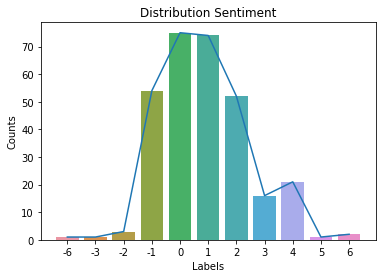

In [ ]:
labels, counts = np.unique(hasil, return_counts=True)

fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())

sns.barplot(x = list(labels), 
            y = list(counts))

sns.lineplot(x = ax.get_xticks(), 
            y = list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


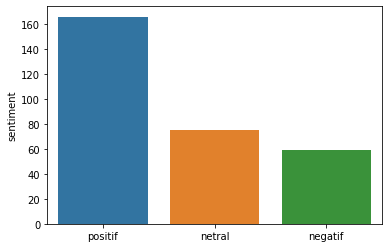

In [ ]:
sns.barplot(df_tweets['sentiment'].value_counts().index,df_tweets['sentiment'].value_counts())

In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

# Berdasarkan distribusi plot menunjukkan bahwa tweet positif mendominasi topik indihome.